# Explore here

1. Recopilación de datos

In [34]:
# Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Exploración y limpieza de datos

In [35]:
data.shape
# nuestro dataset tiene 768 filas y 9 columnas 

(768, 9)

In [36]:
data.info()

# No presentamos datos nulos y todas nuestras variables son de tipo numerico

# Datos numericos: Pregnancies, Glucose, BloodPressure , kinThickness , Insulin BMI,  DiabetesPedigreeFunction, Age
# Datos categoricos: Outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#Se elimina datos irrelevante
data.drop(["Pregnancies","SkinThickness", "Age"], axis = 1, inplace = True)
data.head()

#Nos quedamos con las siguientes variables 
# Datos numericos: Glucose, BloodPressure  , Insulin BMI,  DiabetesPedigreeFunction, Outcome
# Datos categoricos: Outcome


,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,0,33.6,0.627,1
1,85,66,0,26.6,0.351,0
2,183,64,0,23.3,0.672,1
3,89,66,94,28.1,0.167,0
4,137,40,168,43.1,2.288,1


In [39]:
data.columns 

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

3. Análisis de variables univariante

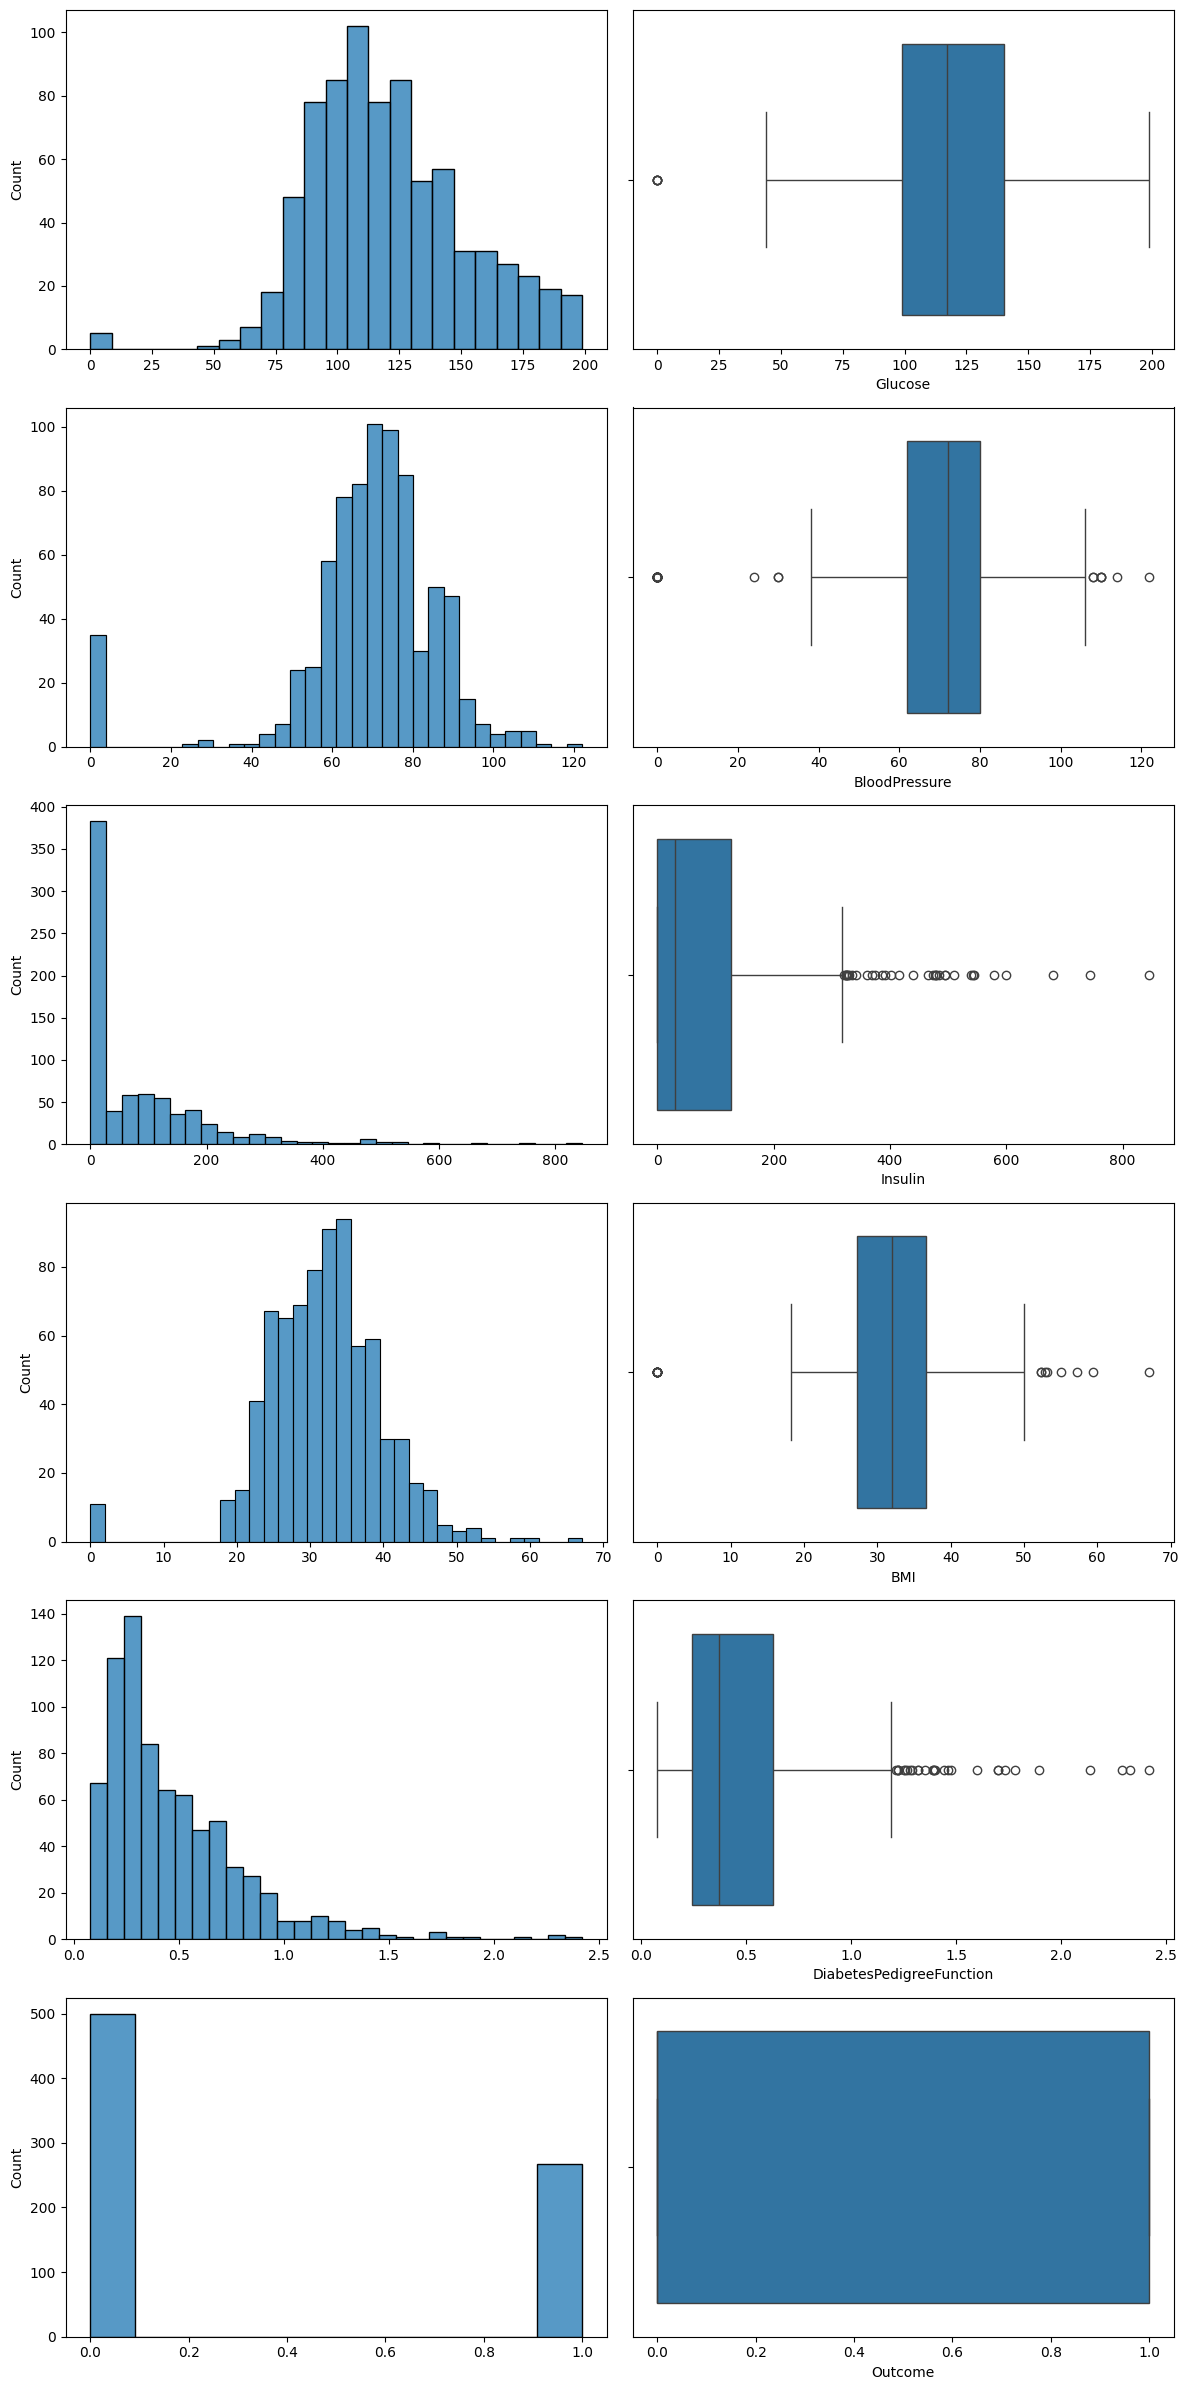

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes (6 filas, 2 columnas), ya que tienes 6 variables
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

# Lista de variables a graficar
variables = ['Glucose', 'BloodPressure', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Outcome']

# Iterar sobre cada variable y graficar histplot y boxplot
for i, var in enumerate(variables):
    sns.histplot(ax=axes[i, 0], data=data, x=var).set(xlabel=None)
    sns.boxplot(ax=axes[i, 1], data=data, x=var)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# se observa 
# tiene una forma de distribucion leve normal en la Glucose, BloodPressure, BMI 
# Tenemos varios outliers especialmente en BloodPressure,Insulin, BMI y 


4. Análisis de variables multivariante

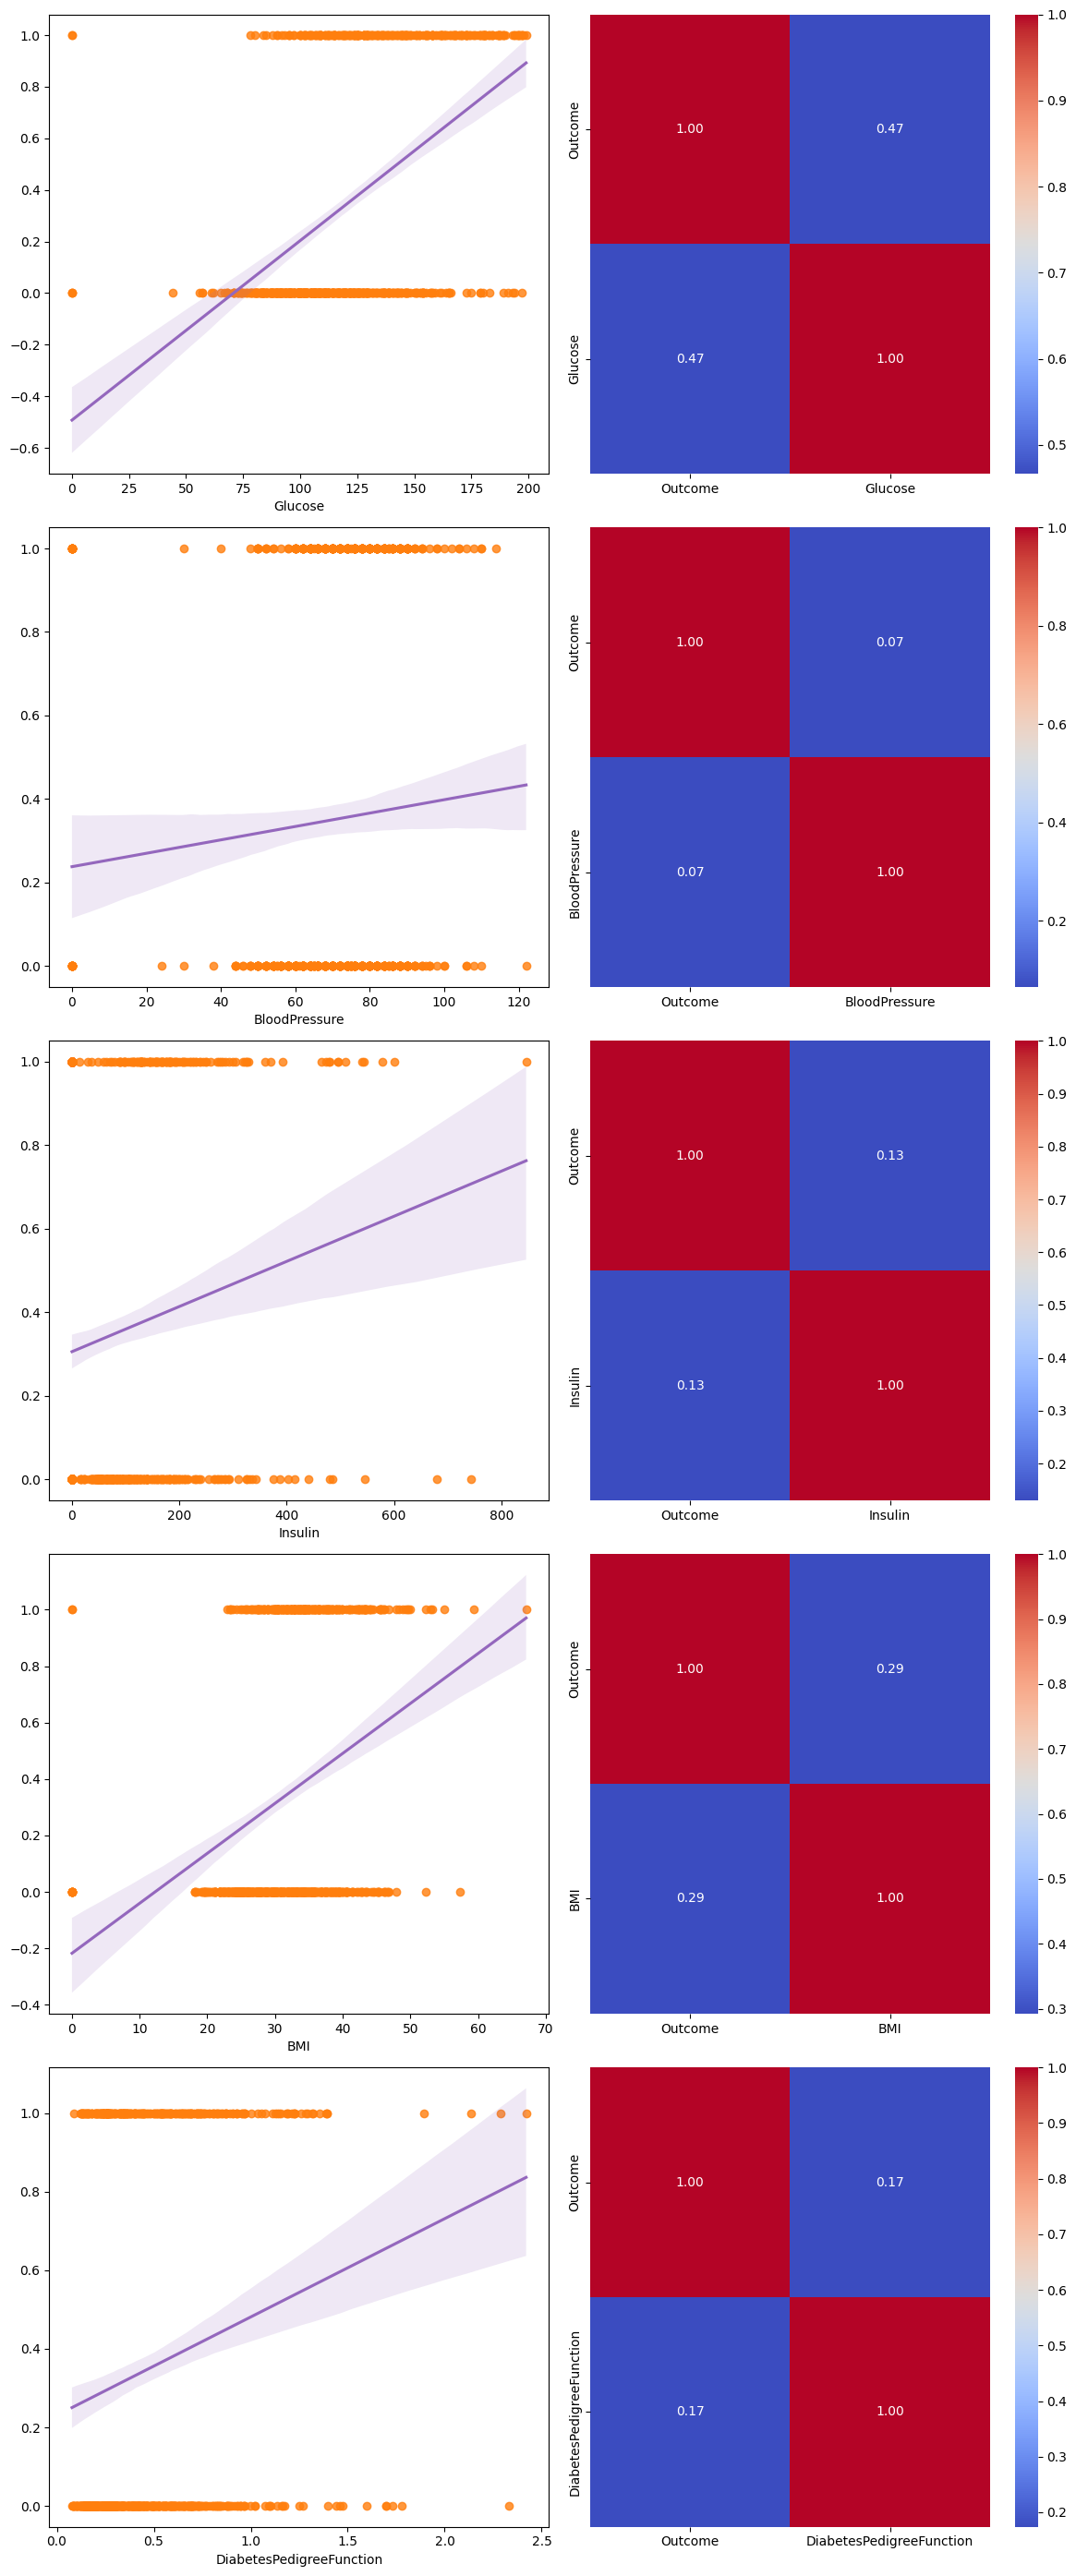

In [41]:
# Crear la figura 
fig, axis = plt.subplots(5, 2, figsize=(12, 28))

# Lista de variables a graficar
variables = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


# Iterar sobre cada variable y graficar regplot y heatmap
for i, var in enumerate(variables):
    # Regplot (Gráfico de regresión)
    sns.regplot(ax=axis[i, 0], data=data, x=var, y="Outcome", 
                scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
    
    # Heatmap (Mapa de calor de correlación)
    sns.heatmap(data[["Outcome", var]].corr(), annot=True, fmt=".2f", 
                ax=axis[i, 1], cmap='coolwarm')

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Se observa
# La variables que mas tienen coorelacion con la variable objetivo son : Glucose (0.47) y el BMI (0.29)
# Tiene sentido que se muestre un alza en la Glucosa , refiriendose a la deabetes 

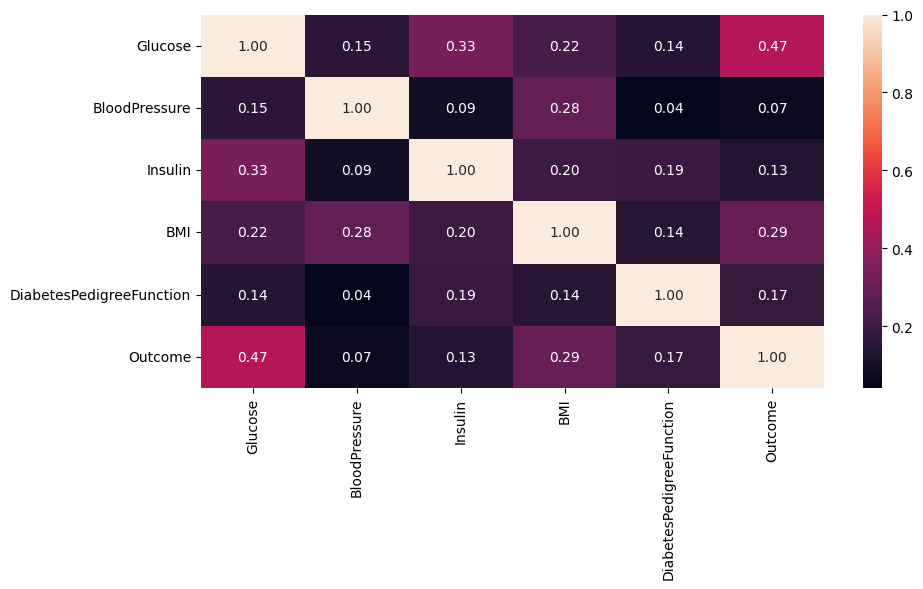

In [42]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Revisamos la corelacion entre todas las variables
# Podemos notar que las que mas tienen relacion entre si son la Glucosa con nuestra variable objetivo y con la Insulin  


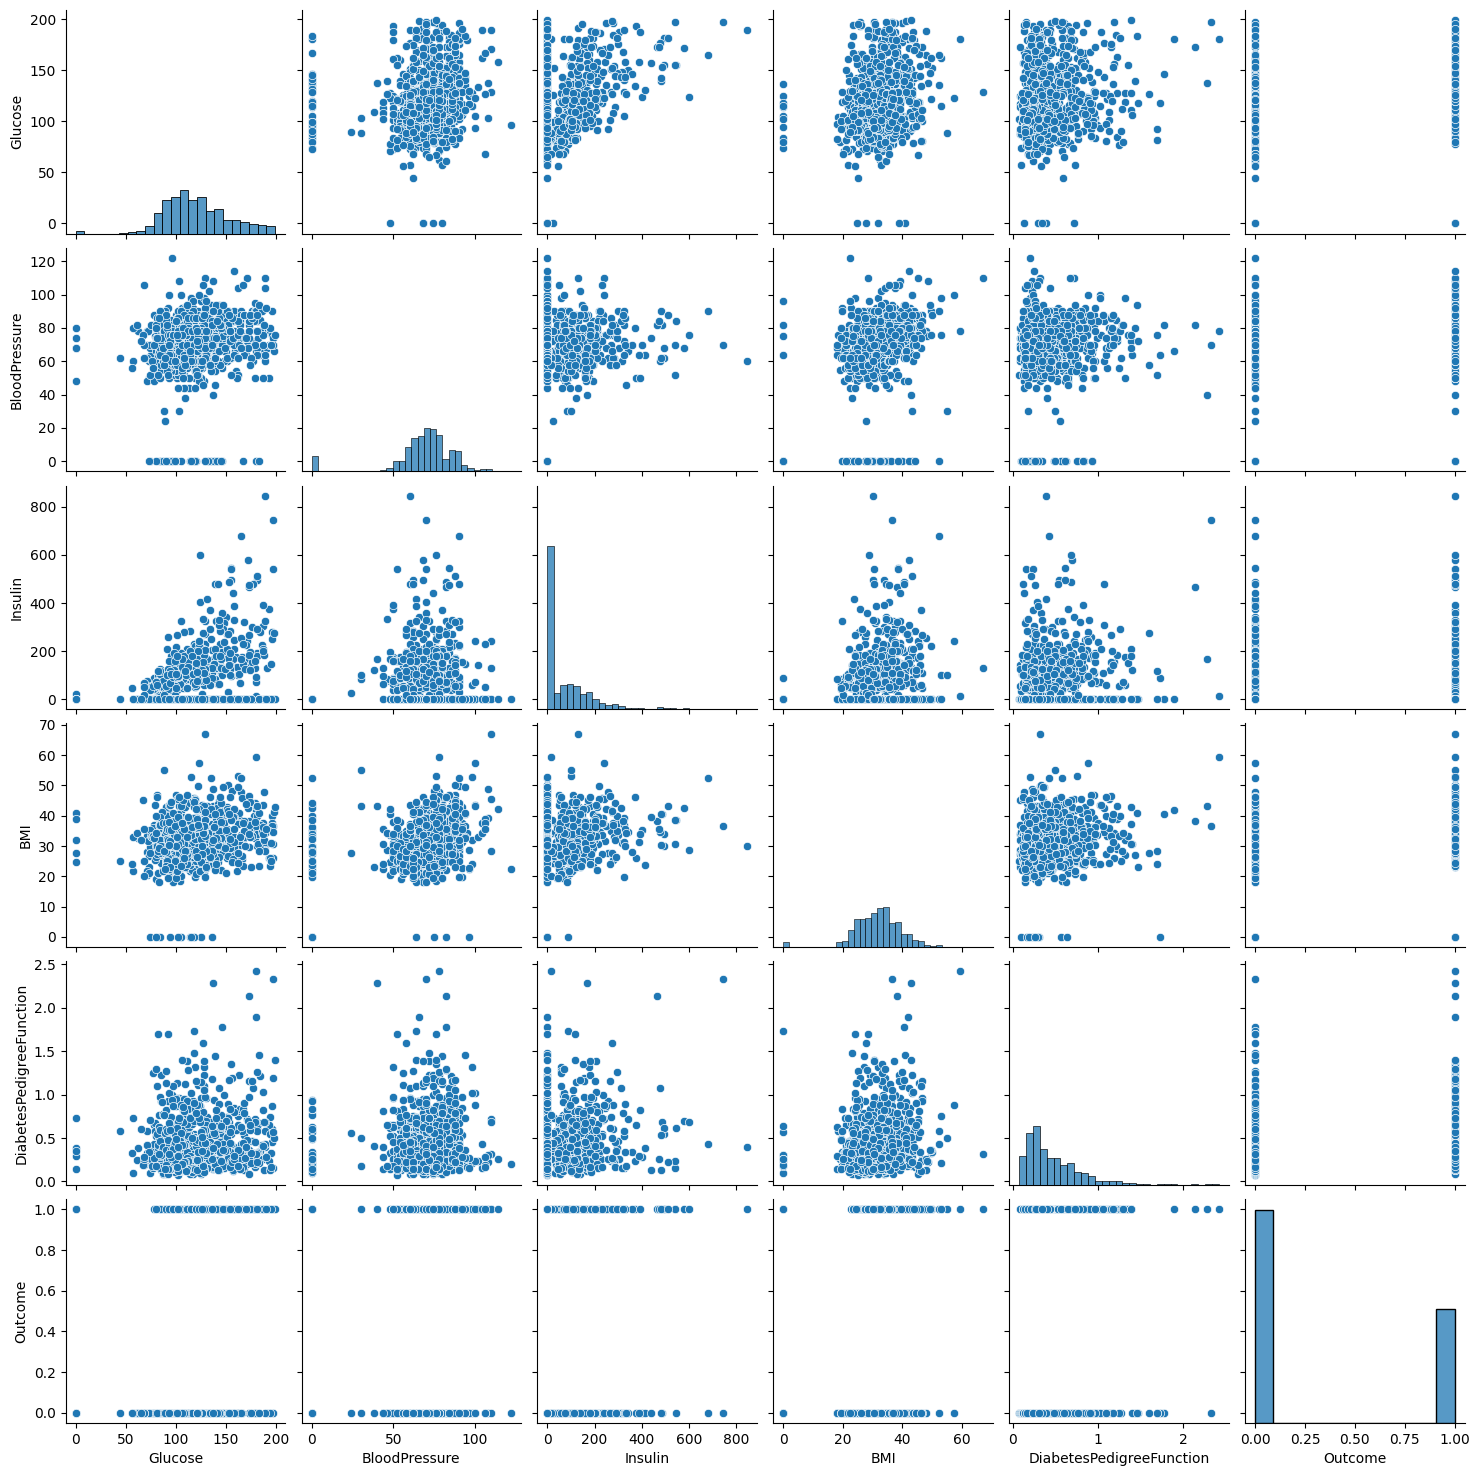

In [43]:
sns.pairplot(data = data)

5. Ingeniería de características

In [44]:
data.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,1.000000


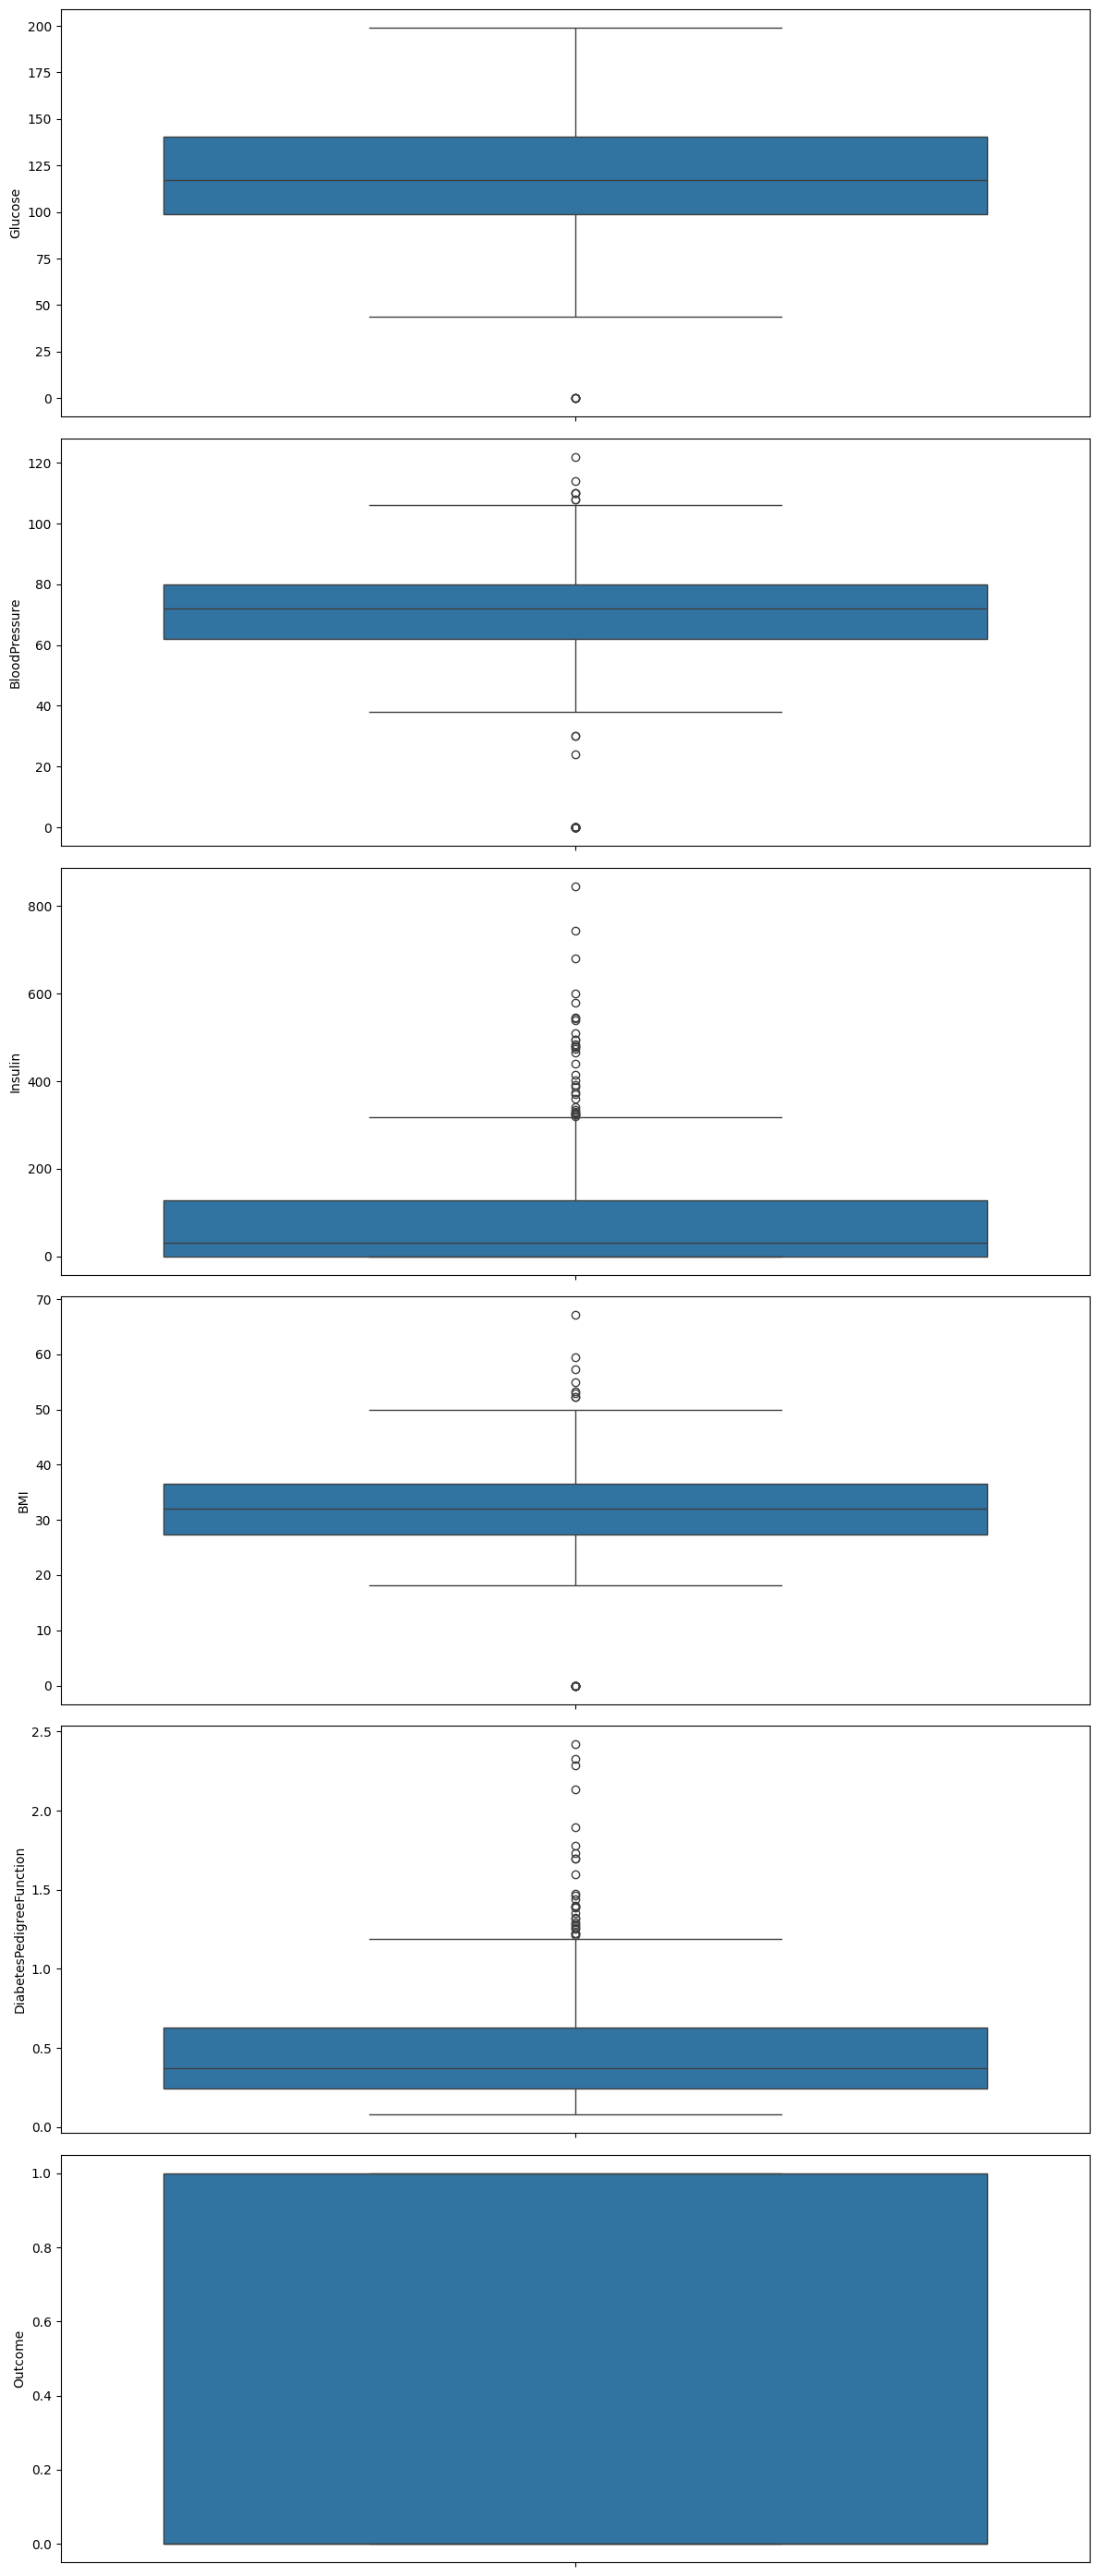

In [45]:
# Crear la figura y los ejes (7 filas, 1 columna)
fig, axis = plt.subplots(6, 1, figsize=(12, 28))

# Lista de variables a graficar
variables = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']

# Iterar sobre cada variable y graficar boxplot
for i, var in enumerate(variables):
    # Boxplot
    sns.boxplot(ax=axis[i], data=data, y=var)
   

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Existen varios outliers , siendo valores atipicos que pueden afectar nuestro modelo. El que mas posee estos valores es Insulin y DiabetesPedigreeFunction

Limpiamos los outliers

In [46]:
data.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [47]:
#Primero revisamos los datos de charges (Q, media , sdt)

Glucose_des= data["Glucose"].describe()

print(Glucose_des)

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [48]:
# IQR 

Glucose_iqr = Glucose_des["75%"] - Glucose_des["25%"]

upper_limit = Glucose_des["75%"] + 1.5 * Glucose_iqr
lower_limit = Glucose_des["25%"] - 1.5 * Glucose_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("Glucose_iqr : ",Glucose_iqr )

upper_limit :  202.125
lower_limit :  37.125
Glucose_iqr :  41.25


In [49]:
# Limpieza de outliers

data = data[(data["Glucose"] <=  202.125) & (data["Glucose"] >= 37.125)]

In [50]:
#Primero revisamos los datos de charges (Q, media , sdt)

BloodPressure_des= data["BloodPressure"].describe()

print(BloodPressure_des)

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [51]:
# IQR 

BloodPressure_iqr = BloodPressure_des["75%"] - BloodPressure_des["25%"]

upper_limit = BloodPressure_des["75%"] + 1.5 * BloodPressure_iqr
lower_limit = BloodPressure_des["25%"] - 1.5 * BloodPressure_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("BloodPressure_iqr : ",BloodPressure_iqr )

upper_limit :  107.0
lower_limit :  35.0
BloodPressure_iqr :  18.0


In [52]:
# Limpieza de outliers

data = data[(data["BloodPressure"] <=  107.0) & (data["BloodPressure"] >= 35.0)]

In [53]:
#Primero revisamos los datos de charges (Q, media , sdt)

Insulin_des= data["Insulin"].describe()

print(Insulin_des)

count    718.000000
mean      84.520891
std      117.242118
min        0.000000
25%        0.000000
50%       48.000000
75%      131.500000
max      846.000000
Name: Insulin, dtype: float64


In [54]:
# IQR 

Insulin_iqr = Insulin_des["75%"] - Insulin_des["25%"]

upper_limit = Insulin_des["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_des["25%"] - 1.5 * Insulin_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("Insulin_iqr : ",Insulin_iqr )

upper_limit :  328.75
lower_limit :  -197.25
Insulin_iqr :  131.5


In [55]:
# Limpieza de outliers

data = data[(data["Insulin"] <=  328.75) & (data["Insulin"] >= 0)]

In [56]:
#Primero revisamos los datos de charges (Q, media , sdt)

BMI_des= data["BMI"].describe()

print(BMI_des)

count    690.000000
mean      32.025507
std        7.078871
min        0.000000
25%       27.300000
50%       32.000000
75%       36.300000
max       59.400000
Name: BMI, dtype: float64


In [57]:
# IQR 

BMI_iqr = BMI_des["75%"] - BMI_des["25%"]

upper_limit = BMI_des["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_des["25%"] - 1.5 * BMI_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("BMI_iqr : ",BMI_iqr )

upper_limit :  49.79999999999999
lower_limit :  13.800000000000006
BMI_iqr :  8.999999999999996


In [58]:
# Limpieza de outliers

data = data[(data["BMI"] <=  49.79999999999999) & (data["BMI"] >= 13.800000000000006)]

In [59]:
Diabetes_P_des = data['DiabetesPedigreeFunction'].describe()

print(Diabetes_P_des)

count    681.000000
mean       0.467652
std        0.314763
min        0.078000
25%        0.245000
50%        0.376000
75%        0.613000
max        2.288000
Name: DiabetesPedigreeFunction, dtype: float64


In [60]:
# IQR 

Diabetes_P_iqr = Diabetes_P_des["75%"] - Diabetes_P_des["25%"]

upper_limit = Diabetes_P_des["75%"] + 1.5 * Diabetes_P_iqr
lower_limit = Diabetes_P_des["25%"] - 1.5 * Diabetes_P_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("Diabetes_P_iqr : ",Diabetes_P_iqr )

upper_limit :  1.165
lower_limit :  -0.30700000000000005
Diabetes_P_iqr :  0.368


In [61]:
# Limpieza de outliers

data = data[(data["DiabetesPedigreeFunction"] <=  1.1962499999999998) & (data["DiabetesPedigreeFunction"] >= 0)]

In [62]:
#Primero revisamos los datos de charges (Q, media , sdt)

Outcome_des= data["Outcome"].describe()

print(Outcome_des)

count    656.000000
mean       0.320122
std        0.466879
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64


In [63]:
# IQR 

Outcome_iqr = Outcome_des["75%"] - Outcome_des["25%"]

upper_limit = Outcome_des["75%"] + 1.5 * Outcome_iqr
lower_limit = Outcome_des["25%"] - 1.5 * Outcome_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("Outcome_iqr : ",Outcome_iqr )

upper_limit :  2.5
lower_limit :  -1.5
Outcome_iqr :  1.0


In [64]:
data = data[(data["Outcome"] <=  2.5) & (data["Outcome"] >= 0)]

Análisis de valor faltante

In [65]:
data.isnull().sum().sort_values(ascending=False)
# Refleja que no tiene datos nulos 

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [67]:
#Selecciona las mejores variables 

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = SelectKBest(k =4)
model.fit(X_train, y_train)

columns = X_train.columns[model.get_support()]
X_train_sel = pd.DataFrame(model.transform(X_train), columns = columns)
X_test_sel = pd.DataFrame(model.transform(X_test), columns = columns)

X_train_sel.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,95.0,72.0,37.7,0.370
1,168.0,88.0,35.0,0.905
2,105.0,75.0,23.3,0.560
3,102.0,76.0,32.9,0.665
4,82.0,64.0,21.2,0.415


In [68]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/train.csv", index = False)
X_test_sel.to_csv("../data/processed/test.csv", index = False)

Modelo de árbol de decisión

In [69]:
# obtenemos los datos de entrenamiento y test

train_data = pd.read_csv("../data/processed/train.csv")
test_data = pd.read_csv("../data/processed/test.csv")

train_data.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome
0,95.0,72.0,37.7,0.370,0
1,168.0,88.0,35.0,0.905,1
2,105.0,75.0,23.3,0.560,0
3,102.0,76.0,32.9,0.665,1
4,82.0,64.0,21.2,0.415,0
